In [1]:
# featured Tickers: 'ABT: Abbott Laboratories', 'AMGN: Amgen','CI: Cigna', 'ESRX: Express Scripts'
# Questions to answer:
# 1: What was the change in price of the stock over time?
# 2: What was the average daily return of the stock over time?
# 3: What was the moving average of the respective stocks?
# 4: What was the correlation between the daily returns of selected stocks?
# 5: How much value do we put at risk by investing in a selection of stocks?
# 6: How can we attempt to predict the future stock behavior?

In [8]:
#Data Imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# Viz Imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader
import pandas.io.data as pdweb

# For time 
from datetime import datetime

# For division

from __future__ import division

plt.style.use('fivethirtyeight')

In [5]:
# The healthcare stocks we'll use for this analysis
health_list = ['ABT','AMGN','CI','ESRX']

# Time Period
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#Grabbing Yahoo data and creating DataFrame

for stock in health_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    

In [6]:
#Taking a look at the data layout for 'ABT'
ABT.describe()

,Open,High,Low,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,41.842835,42.234291,41.455315,41.859764,8.336131e+06,41.315656
std,2.964893,2.930179,2.942834,2.919512,4.750867e+06,2.790015
min,36.169998,36.849998,36.000000,36.340000,1.462900e+06,35.898225
25%,39.250000,39.545001,38.932499,39.220000,5.701575e+06,38.814832
50%,42.019998,42.264999,41.609999,42.005001,7.487900e+06,41.435380
75%,44.440001,44.942499,43.900000,44.240002,1.002825e+07,43.695847
max,50.310001,50.599998,50.250000,50.439999,5.452770e+07,49.228477


In [48]:
ABT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2015-07-21 to 2016-07-21
Data columns (total 6 columns):
Open         254 non-null float64
High         254 non-null float64
Low          254 non-null float64
Close        254 non-null float64
Volume       254 non-null int64
Adj Close    254 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


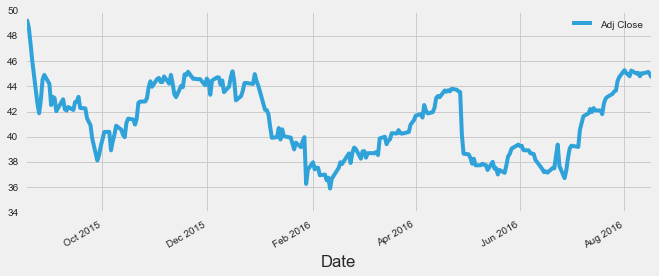

In [12]:
#Price over the last year
ABT['Adj Close'].plot(legend=True,figsize=(10,4))


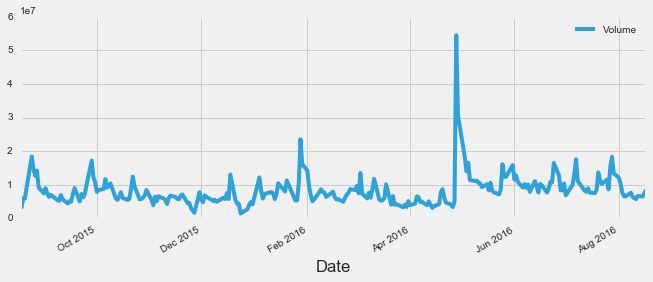

In [13]:
#Plotting LAst Years Volume
ABT['Volume'].plot(legend=True,figsize=(10,4))

In [15]:
# MA = Moving Average
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s Days" %(str(ma))
    ABT[column_name]=pd.rolling_mean(ABT['Adj Close'],ma)

/Users/t-carpen93/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/t-carpen93/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/Users/t-carpen93/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


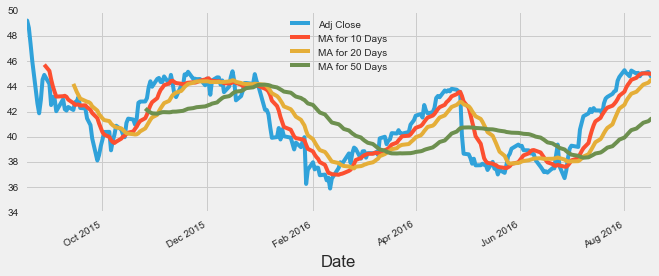

In [16]:
# Moving Average for 10,20 and 50 Days: Abbott Laboratories.
ABT[['Adj Close', 'MA for 10 Days','MA for 20 Days','MA for 50 Days']].plot(subplots=False,figsize=(10,4))

In [17]:
#Daily Returns

CI['Daily Return']=CI['Adj Close'].pct_change()

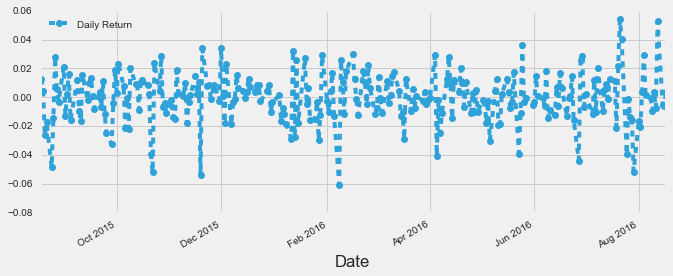

In [18]:
CI['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker = 'o')

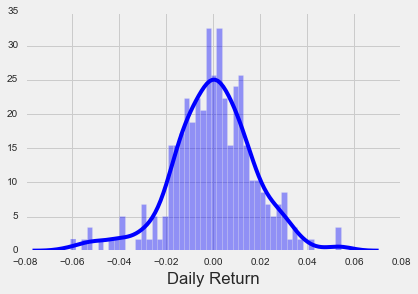

In [19]:
#Histogram of daily returns for past year.
sns.distplot(CI['Daily Return'].dropna(),bins=50,color='blue')

In [23]:
closing_df=pdweb.get_data_yahoo(['ABT','AMGN','CI','ESRX'],start,end)['Adj Close']
closing_df.head()

,ABT,AMGN,CI,ESRX
Date,,,,
2015-08-17,49.169921,165.707728,146.548092,89.120003
2015-08-18,49.228477,163.687505,148.447558,89.870003
2015-08-19,48.642890,162.565161,149.107357,89.790001
2015-08-20,47.364354,157.275461,145.198487,88.129997
2015-08-21,45.997983,151.458766,142.669211,84.809998


In [24]:
health_rets = closing_df.pct_change()
health_rets.head().dropna()

,ABT,AMGN,CI,ESRX
Date,,,,
2015-08-18,0.001191,-0.012191,0.012961,0.008416
2015-08-19,-0.011895,-0.006857,0.004445,-0.000890
2015-08-20,-0.026284,-0.032539,-0.026215,-0.018488
2015-08-21,-0.028848,-0.036984,-0.017419,-0.037672


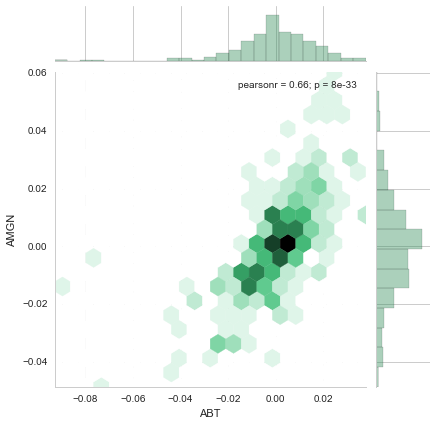

In [124]:
sns.jointplot('ABT','AMGN',health_rets,kind='hex', color='seagreen')

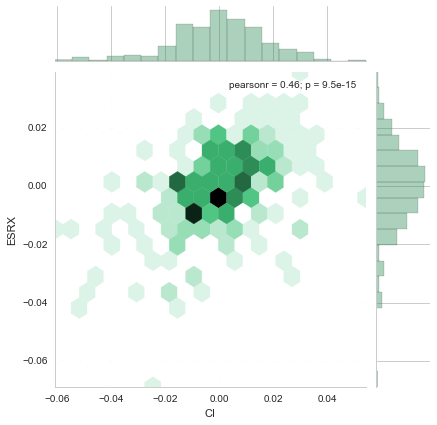

In [127]:
sns.jointplot('CI','ESRX',health_rets,kind='hex', color='seagreen')

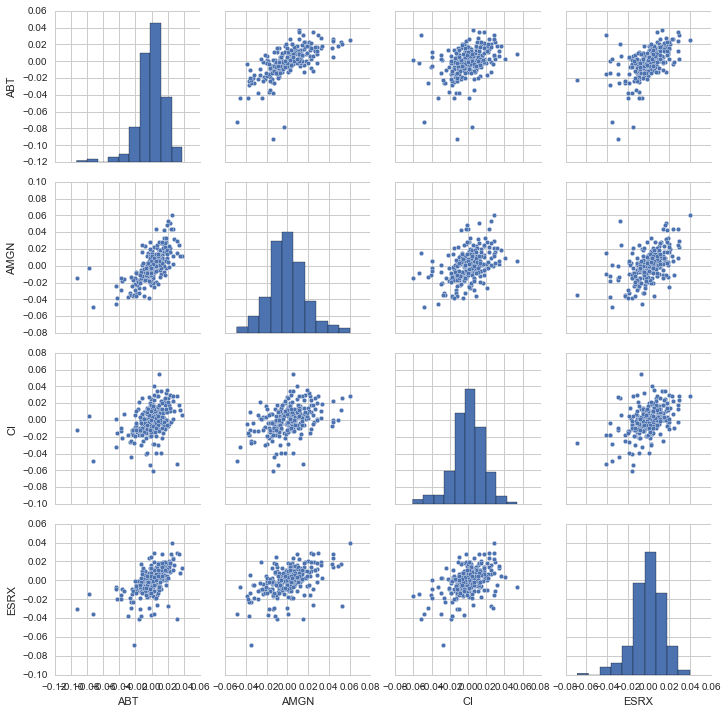

In [132]:
#Pairplot of all our health stock daily returns
sns.pairplot(health_rets.dropna())

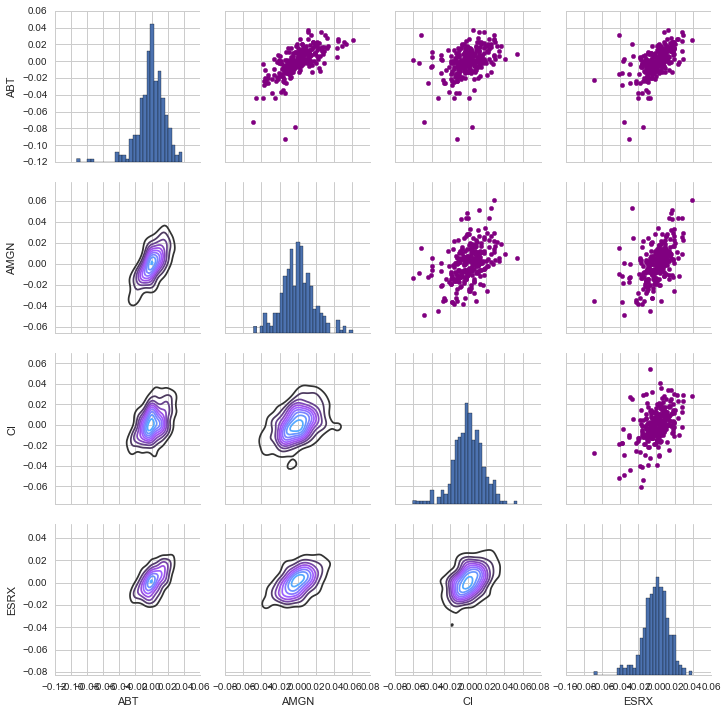

In [135]:
returns_fig = sns.PairGrid(health_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

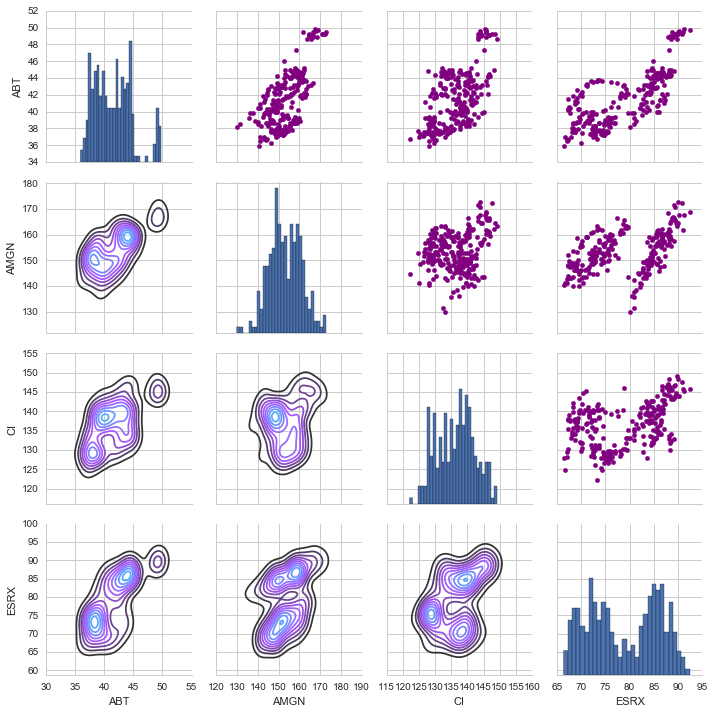

In [136]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

In [25]:
#risk analysis

rets=health_rets.dropna()


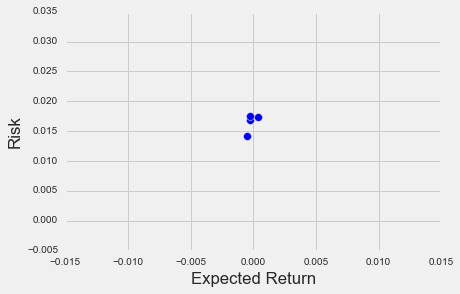

In [42]:
area=np.pi * 20

plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

#This selection of stocks all represent a similar level of risk vs expected returns

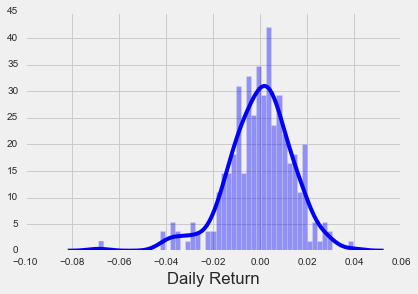

In [27]:
#Value at Risk Analysis For ESRX.

ESRX['Daily Return']=ESRX['Adj Close'].pct_change()
sns.distplot(ESRX['Daily Return'].dropna(),bins=50,color='blue')

In [161]:
#States that at a 95% confidence interval our worst daily loss would not exeed 2.6% based off the past
#Value at Risk using Bootstrap Method = -2.6%
rets['ESRX'].quantile(0.05)


-0.025537062673518462

In [32]:
#Value at Risk Using Monte Carlo Simulation

#Set Time

days=365

#Set Delta

dt=1/days

#Calculate the mean of yearly returns (drift or mu)

mu=rets.mean()['ABT']

#Stand. Dev. of average return is now needed as our measure of volatility (shock)

sigma=rets.std()['ABT']

In [33]:
def monte_carlo(start_price,days,mu,sigma):
    
    price=np.zeros(days)
    price[0]=start_price
    
    shock=np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [165]:
ABT.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-07-27,50.639999,50.849998,50.209999,50.689999,5484200,49.472472
2015-07-28,51.090000,51.240002,50.650002,50.939999,5734900,49.716468
2015-07-29,50.980000,51.169998,50.759998,51.060001,3530700,49.833588
2015-07-30,50.950001,51.049999,50.540001,50.770000,3665000,49.550553
2015-07-31,51.070000,51.130001,50.599998,50.689999,5573500,49.472472


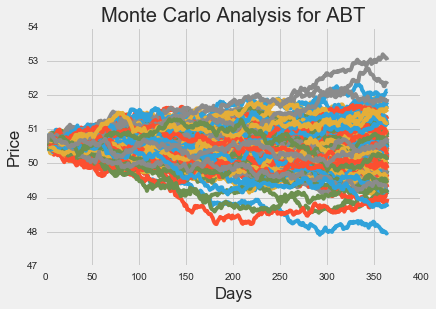

In [34]:
start_price=50.63

for run in xrange(100):
    plt.plot(monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for ABT')
    

In [35]:
runs=10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = monte_carlo(start_price,days,mu,sigma)[days-1]

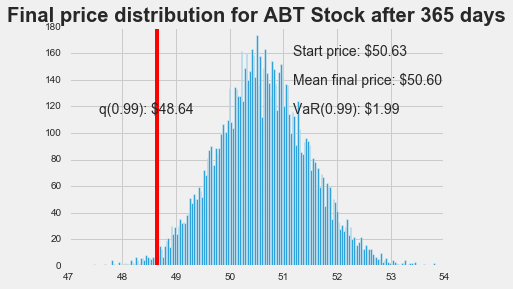

In [36]:
q=np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for ABT Stock after %s days" % days, weight='bold');